In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

**Read CSV file as Pandas Dataframe.**

In [4]:
df = pd.read_csv("toyota.csv")

display(df.head())  #head() will show the first 5 rows of the CSV file by default.
display(df.tail())  #tail() will show the first 5 rows of the CSV file by default.

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


**Full information of the dataframe."**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


**Count the unique values of the "transmission" Column** 

In [6]:
print(df["transmission"].unique()) 
print(df["transmission"].value_counts())  

['Manual' 'Automatic' 'Semi-Auto' 'Other']
Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


**Pie Chart for the "tranmission" Plot.**

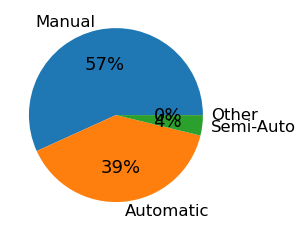

In [7]:
df["transmission"].value_counts().plot(kind="pie",
                                autopct= "%1.0f%%")    #for creatinf pie chart.
plt.ylabel("")  #It is used for remove the label of the y-axis.
plt.show()     # it will show the figure only.

In [8]:
print(df["transmission"].value_counts())

print(type(df["transmission"].value_counts()))

df_transmission  = pd.DataFrame(df["transmission"].value_counts()) #This command ["pd.DataFrame"] converts a seris to DataFrame.

display(df_transmission.head())  #head() will show the first 5 rows of the CSV file by default. 

print(df_transmission.index)     #express the index of the dataframe.

print(df_transmission.columns)   #express the column of the dataframe.

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64
<class 'pandas.core.series.Series'>


,transmission
Manual,3826
Automatic,2657
Semi-Auto,254
Other,1


Index(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype='object')
Index(['transmission'], dtype='object')


In [9]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())

df_transmission = df_transmission.reset_index()        # This command ("reset_index()") is used to reset the index of the dataframe.

df_transmission = df_transmission.rename(columns= {"index":"Transmission",
                                                    "transmission":"Num of Cars"})  # The command is used to rename the column name.

display(df_transmission)


,Transmission,Num of Cars
0,Manual,3826
1,Automatic,2657
2,Semi-Auto,254
3,Other,1


**Barplot for the "tranmission" column.**

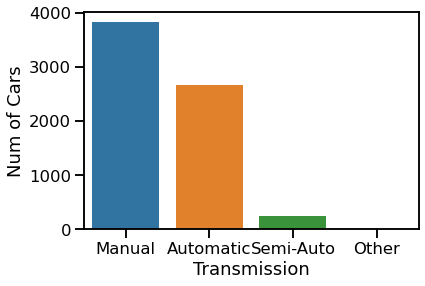

In [10]:
sns.barplot(x="Transmission", 
            y="Num of Cars",
            data = df_transmission) 
plt.show()

**Which is Better between Barplot and Pi Chart and why?**

**Answer:** Between barplot and pie chart, a bar plot is better than a pie chart.In barplot we can clearly understand what kind of information the plot carries. There are no values in the x label that overlap with another value. But from the pie chart, we see that the information is not easily understandable. The portion of "other" and "semi-auto" overlap with each other, so we can say that a barplot is better than a pie chart, which is very clear for getting information.

**Scatter Plot, Regression Plot, Pair Plot**

In [11]:
df = pd.read_csv("toyota.csv")

display(df.head())  #head() will show the first 5 rows of the CSV file by default.


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


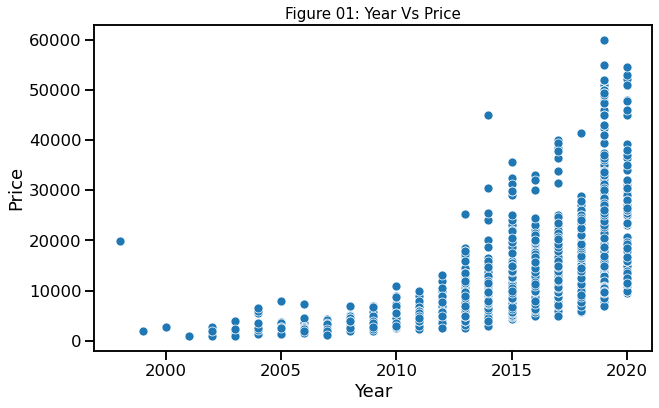

In [12]:
plt.figure(figsize= (10,6))

sns.scatterplot(x= "year", y= "price" , data =df)

plt.title("Figure 01: Year Vs Price", fontsize=15)   #this command is used for giving a title to the figure

plt.xlabel('Year',fontsize=18)    #used for rename & resize the variable of x-axis

plt.ylabel('Price',fontsize=18)  #used for rename & resize the variable of y-axis.

plt.show()


In figure 1, this is a scatter plot of year vs price.In this plot, the price of cars doesn't have any direct relationship with the year.So there is no correlation between the x-axis and y-axis.

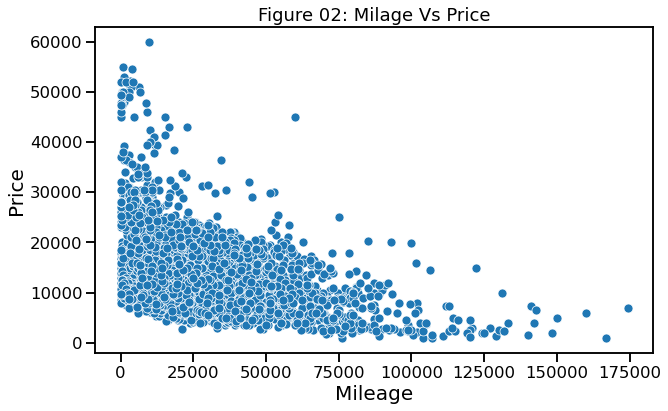

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "mileage" , y= "price" , data = df)

plt.title("Figure 02: Milage Vs Price", fontsize=18)    

plt.xlabel('Mileage', fontsize=20)  
plt.ylabel('Price', fontsize=20)    
plt.show()

In figure 2, this is a scatter plot of Mileage vs Price. Scatter plots shows the correlation between the x-axis and y-axis. In this plot Mileage and Price shows a negative correlation because the value of the y-axis is reduced with the increase of the x-axis.

C:\Users\user\AppData\Local\Temp/ipykernel_1228/4008542198.py:21: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(8)  # Padding between the figure edge and the edges of subplots.used to create a gap between two subplots to understand the labeling properly.


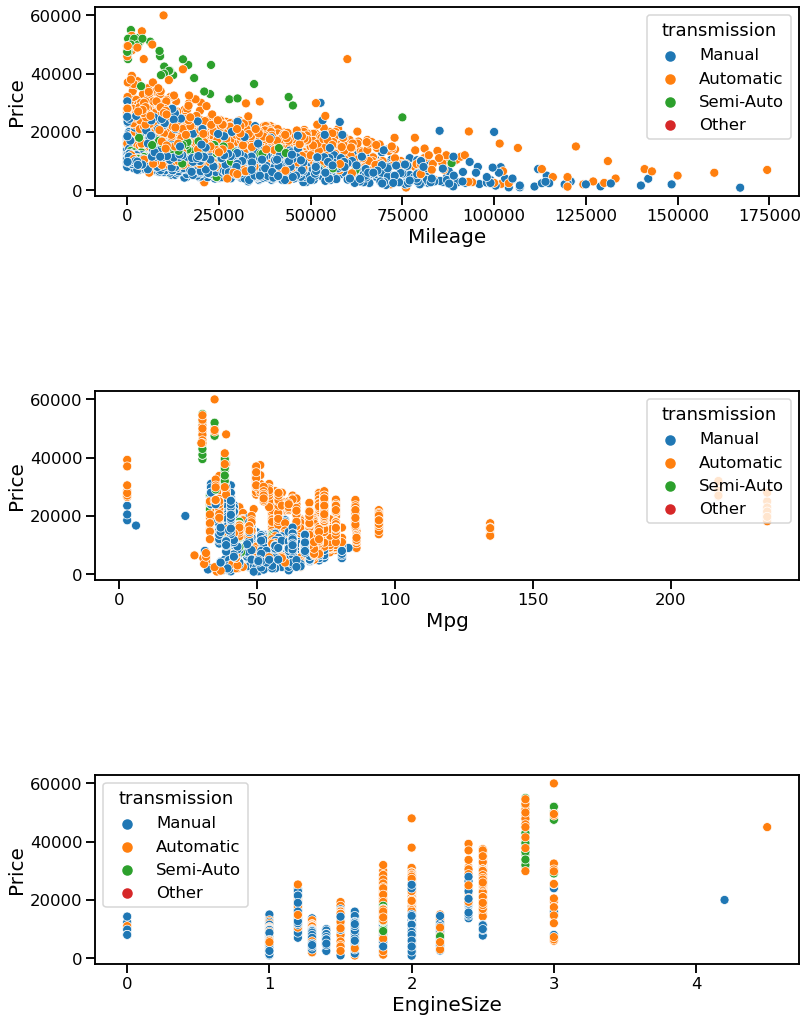

In [14]:
plt.figure(figsize= (15,18))

plt.subplot(3,1,1)
sns.scatterplot(x = "mileage", y="price", data = df , hue = "transmission")  # "hue" has been used to see the relationship between price and mileage and transmission
plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)


plt.subplot(3,1,2)
sns.scatterplot(x = "mpg", y="price", data = df, hue = "transmission")
plt.xlabel("Mpg", fontsize = 20)
plt.ylabel("Price", fontsize = 20)

plt.subplot(3,1,3)
sns.scatterplot(x= "engineSize", y="price", data =df, hue = "transmission") 

plt.xlabel("EngineSize", fontsize = 20)  # used for rename & resize the variable of x-axis.
plt.ylabel("Price", fontsize = 20)      # used for rename & resize the variable of y-axis.


plt.tight_layout(8)  # Padding between the figure edge and the edges of subplots.used to create a gap between two subplots to understand the labeling properly.

plt.show()

The upper plot is known as a subplot as there are more than one plot in this plot.In this subplot postion 1 shows the plot of mileage vs price.here, The cars that run manually have lower prices and the price of the car that runs automatically is in the medium range. Cars with semi-auto transmission have the highest price. This plot shows a negative correlation as the price is reduced with the increase of mileage.But In positions 2 and 3,From the plots of these two positions, it is not possible to determine whether there is any relation between engineSize and MPG with the price.So, there is no correlation.

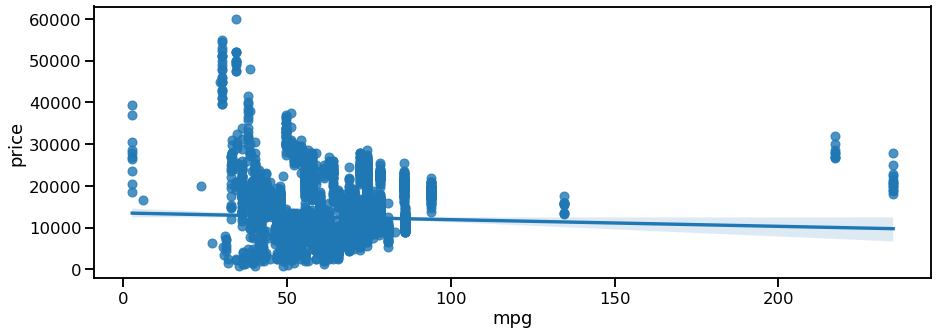

In [15]:
plt.figure(figsize=(15,5))

sns.regplot(x = "mpg", y ="price" , data=df)

plt.show()


It is a regression plot.The straight line represented the trend line of this plot.This straight line indicates a correlation between the x and y axes.It is not possible to determine whether there is any relationship between the X and Y axes in this figure.

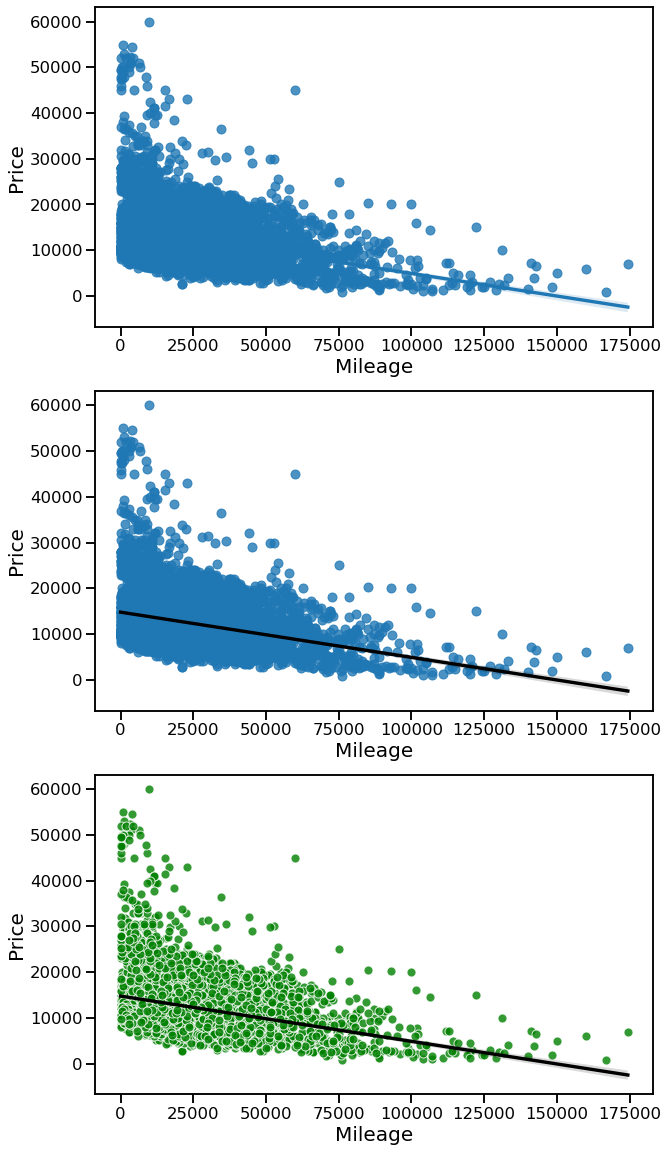

In [16]:
plt.figure(figsize= (10,20))

plt.subplot(3,1,1)
sns.regplot(x = "mileage", y="price", data = df)  # "hue" has been used to see the relationship between price and mileage and transmission
plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)


plt.subplot(3,1,2)
sns.regplot(x = "mileage", y="price", data = df, line_kws = {"color":"black"}) #"line_kws" is used to change color of slope.
plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)


plt.subplot(3,1,3)
sns.regplot(x = "mileage", y="price", data = df, scatter_kws= {"color":"green" , "edgecolor":"white"}, line_kws = {"color":"black"}) # "scatter_kws" used for change any characteristic of the scatter plot

plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)  # used for rename & resize the variable of y-axis.

plt.show()

The figure above shows the trend line between "price" vs. "mileage". This trend line shows that there is a correlation between price and mileage. As the value of the Y axis decreases with increasing the value of the X axis in this plot, the slope of this straight line is along the negative X axis. So there is a negative co-relation between price and mileage. In the 1st and 2nd position of this subplot there is no differenciation between the points of SCATTER plot. So for better understanding the color of the edges of the dots has been changed using "scatter_kws".

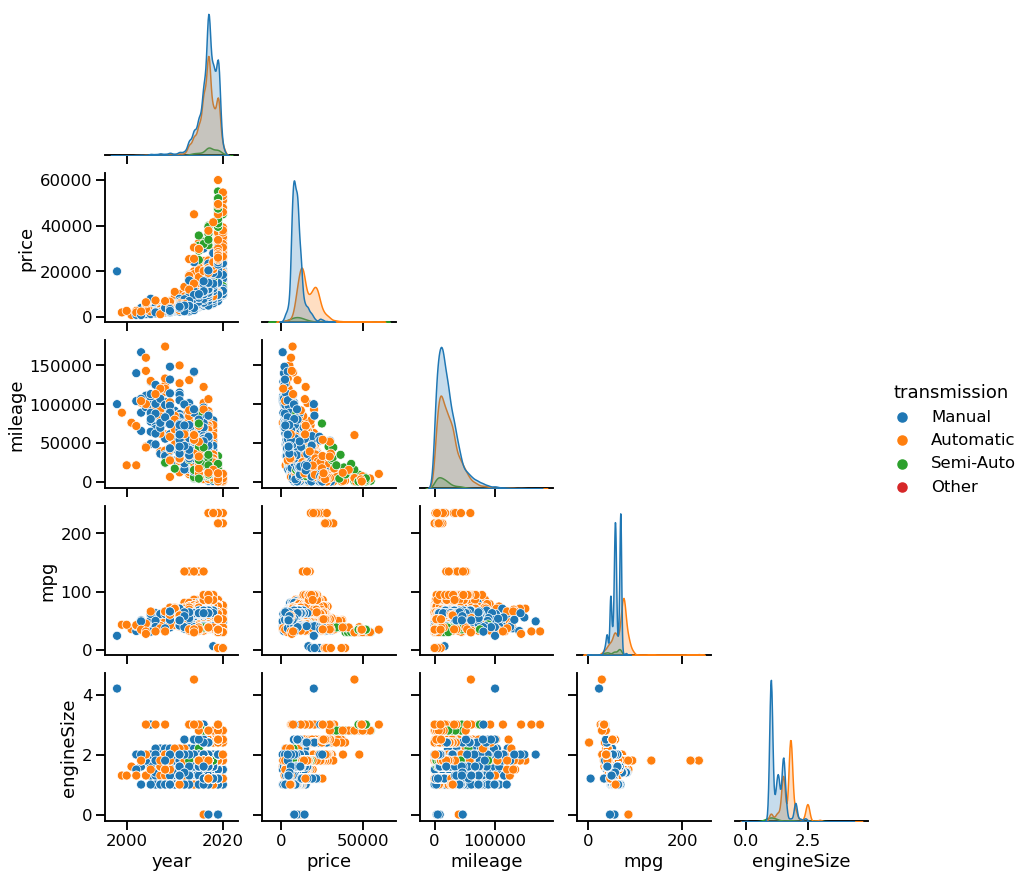

In [17]:
sns.pairplot(df, corner =True, hue = "transmission")

In pairplot, the number of rows and columns are same as the number of numeric variables in Dataset.Since this Dataset has 5 numerical variables, there are 5 rows and columns in this pairplot.Here every two numeric variables will be related to each other.It is seen from the pairplot that there is a negative correlation of mileage with the price.

In [18]:
display(df["engineSize"].value_counts())    #for find the value of "engineSize"

display(df.describe()) # this commad is used for describe the whole data numeric value.

1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: engineSize, dtype: int64

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


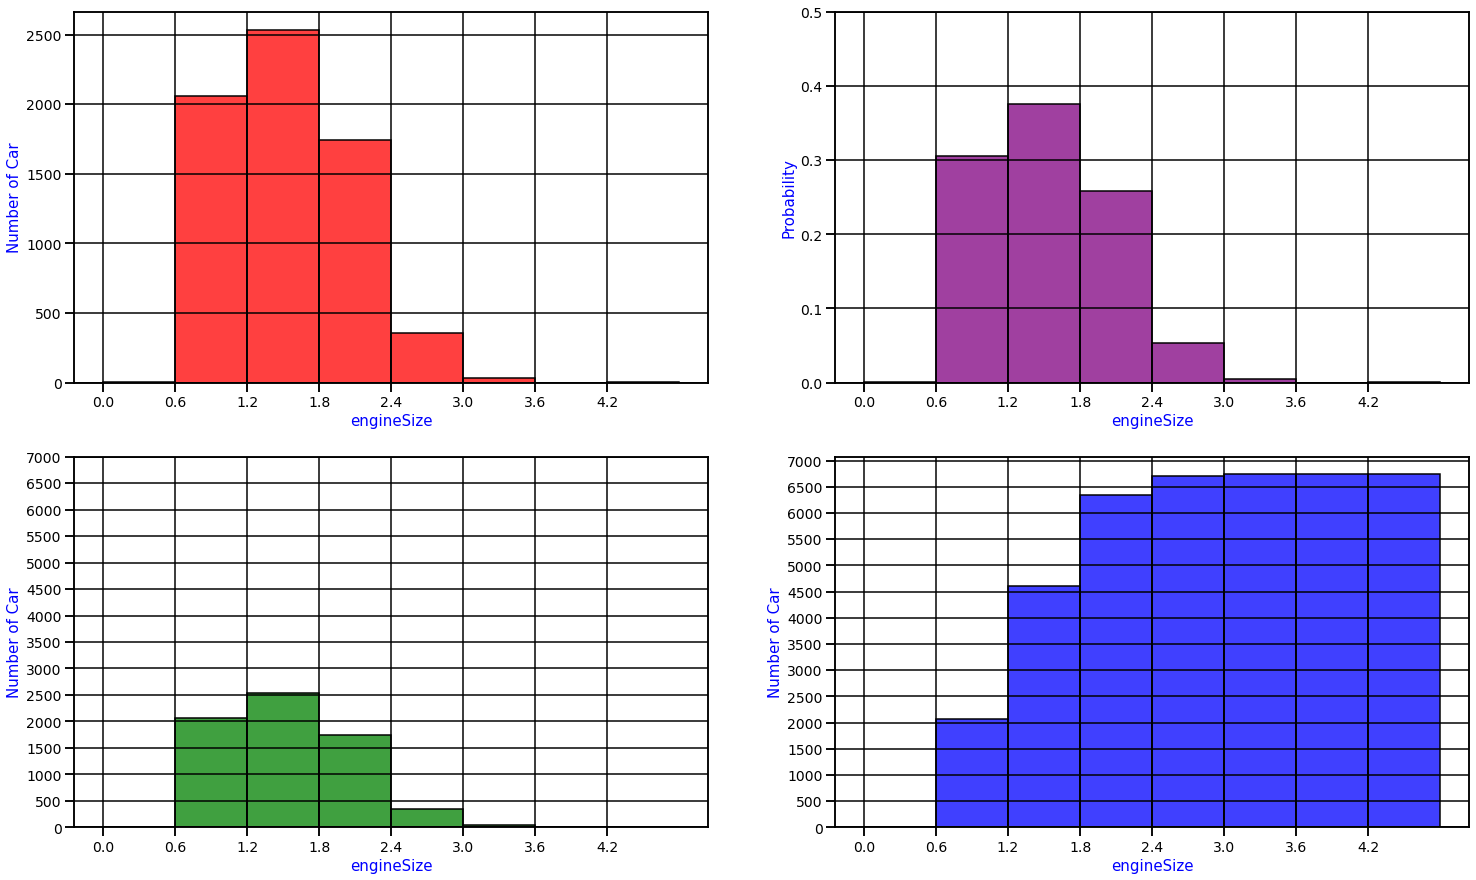

In [19]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(x = "engineSize", data=df, binwidth=0.6, color="Red")
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14) 
plt.yticks(fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")  #for rename xticks, The boxplate above shows that the engine size of a hybrid car is the smallest between 1.5 and 2.0. Their mpg is 59 to 88 miles per gallon higher than other fuel-type vehicles. The cars that run on diesel their Mileage is the highest from other fuelType cars.                                                    #Cars that run on petrol are cheaper than others
plt.ylabel("Number of Car", fontsize = 15, color = "Blue")
plt.grid(color="Black")


plt.subplot(2,2,2)
sns.histplot(x = "engineSize", data=df, binwidth= 0.6, color="purple", stat = "probability") 
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14)
plt.yticks(np.arange(0, 0.6, 0.1),fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")
plt.ylabel("Probability", fontsize = 15, color = "Blue") #rename the variable of y axis and change the fontsize and cover it.
plt.grid(color="Black")


plt.subplot(2,2,3)
sns.histplot(x = "engineSize", data=df, binwidth= 0.6, color="Green")
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14) # "np.arange" is used for arrange the value of x axis 
plt.yticks(np.arange(0,7500,500),fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")
plt.ylabel("Number of Car", fontsize = 15, color = "Blue")
plt.grid(color="Black")


plt.subplot(2,2,4)
sns.histplot(x = "engineSize", data=df, binwidth= 0.6, color="blue" ,cumulative=True) #"cumulative = True " is used for ecdf
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14)
plt.yticks(np.arange(0,7500,500),fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")
plt.ylabel("Number of Car", fontsize = 15, color = "Blue")
plt.grid(color="Black")
 

plt.show()


In the above this is a histogram of enginSize. This Histogram has only one peak the modality of this histogram is unimodal.The X-axis represents the size of the car engine and Y-axis represents the total number of cars with respect to the engine size.From this histogram we can easily understand the range of engineSize".
Position 2  histogram shows the probability of the car such as the percentages of 1.2 to 1.8 engine size car are approximate 0.37.
In position 4, this histogram is known as ECDF or Empirical Cumulative Distribution Functions.Difference between position 3 and 4 is in position 3 it is a normal histogram and in p ostion 4 it is ecdf.In this histogram, each bin is the combination of their previous bins.


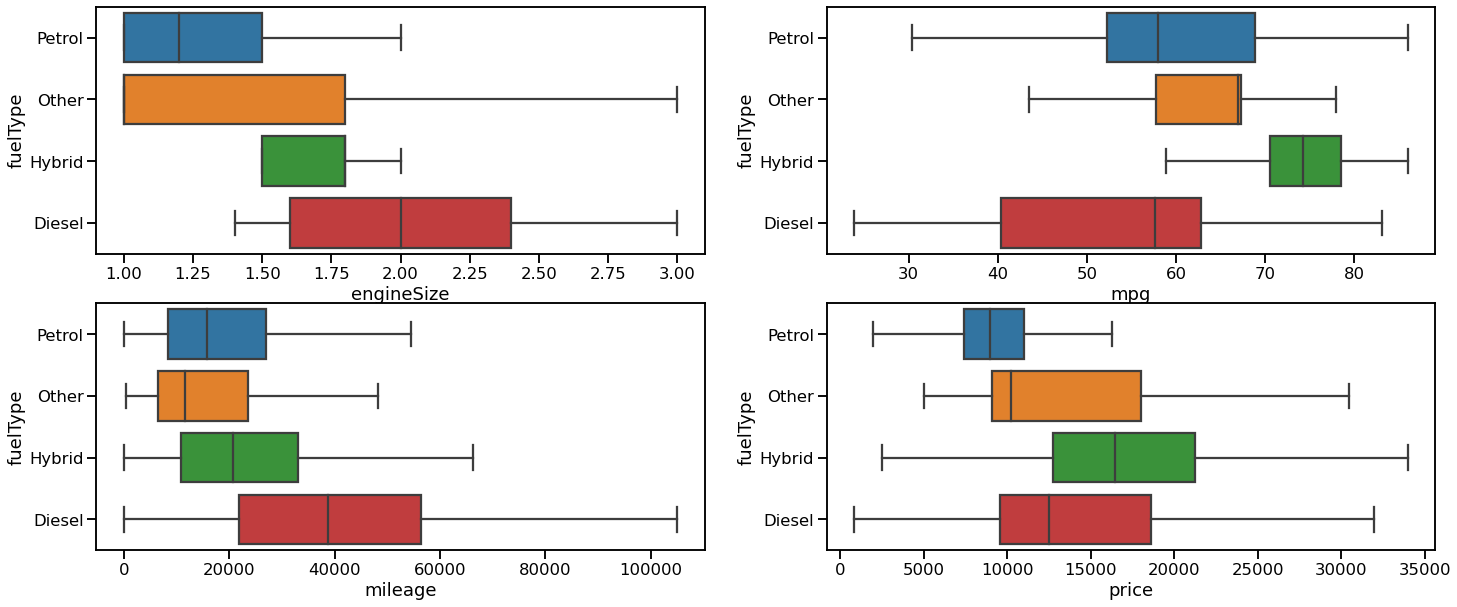

In [20]:
plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
sns.boxplot(x="engineSize",data=df,showfliers=False, y = "fuelType") #"showfair e used for ecdf"



plt.subplot(2,2,2)
sns.boxplot(x="mpg",data=df,showfliers=False, y = "fuelType")


plt.subplot(2,2,3)
sns.boxplot(x="mileage",data=df,showfliers=False, y = "fuelType")



plt.subplot(2,2,4)
sns.boxplot(x="price",data=df,showfliers=False, y = "fuelType")



plt.show()

The boxplate above shows that the engine size of a hybrid car is the smallest between 1.5 and 2.0. Their mpg is 59 to 88 miles per gallon higher than other fuel-type vehicles. The cars that run on diesel their Mileage is the highest from other fuelType cars.Cars that run on petrol are cheaper than others